# Fundamental_analysis

In [99]:
# 영업이익률 = 영업이익/ 매출액
# 자기자본이익률(ROE) = 순이익/자기자본
# 총자본이익률(ROA) = 순이익/총자산

# 유동비율 = 유동자산/유동부채
# 이자보상비율 = 영업이익/이자비용

# 주상순이익(EPS) = 순이익/ 주식수
# PER = 주가/EPS
# 주당순자산(BPS) = 자기자본/주식수
# PBR = 주가/BPS

# 매출성장률
# 영업이익성장률

In [100]:
import pandas as pd
import numpy as np

In [101]:
df = pd.read_csv('./data/fin_statement_new.csv')
df.head()

,Code,Name,결산월,상장일,시가총액,유통시가총액,"P/E(Adj., FY End)","P/B(Adj., FY End)","P/S(Adj., FY End)","P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,"DPS(보통주, 현금+주식, 연간)",year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,12,19760324,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,600.0,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,12,19760525,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,0.0,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,12,19560303,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,0.0,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,12,19681227,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,1050.0,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,12,19621101,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,1000.0,2006,24911,7.53,95212024.0,746417156.0


In [102]:
df = df.drop(['결산월','상장일','DPS(보통주, 현금+주식, 연간)'], axis=1)

In [103]:
df.head()

,Code,Name,시가총액,유통시가총액,"P/E(Adj., FY End)","P/B(Adj., FY End)","P/S(Adj., FY End)","P/FCF1(Adj., FY End)",EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0


In [104]:
# 연도별 회사 개수 
df.year.value_counts()

2017    1838
2016    1771
2015    1692
2014    1655
2012    1653
2013    1643
2009    1636
2011    1634
2010    1623
2008    1606
2007    1538
2006    1479
Name: year, dtype: int64

In [105]:
df = df.rename(columns={
    'P/E(Adj., FY End)': 'per',
    'P/B(Adj., FY End)': 'pbr',
    'P/S(Adj., FY End)' : 'psr',
    'P/FCF1(Adj., FY End)': 'pcr',
})

## 연도별 roa상위 10개 종목에 투자할 경우 투자수익률 구하기(종목당 투자비율은 동일)

In [106]:
df.head()

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0


In [107]:
yearly_price_df = df.pivot(index= 'year', columns='Name', values='수정주가')
yearly_price_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,830.0,6530.0,NaN,1997.0,1250.0,NaN,NaN,12960.0,2940.0,NaN,...,NaN,NaN,NaN,5356.0,1976.0,NaN,NaN,1979.0,2941.0,1212.0
2007,686.0,5410.0,NaN,1600.0,2200.0,NaN,NaN,26015.0,2607.0,NaN,...,NaN,6385.0,NaN,11430.0,3393.0,NaN,NaN,3011.0,8072.0,1120.0
2008,524.0,930.0,799.0,244.0,835.0,NaN,NaN,8859.0,2566.0,NaN,...,NaN,4538.0,NaN,13179.0,2420.0,NaN,NaN,1053.0,7687.0,210.0
2009,1163.0,5.0,1770.0,911.0,2820.0,NaN,NaN,10362.0,3185.0,NaN,...,NaN,5549.0,NaN,18336.0,2660.0,NaN,NaN,1151.0,11000.0,5.0
2010,3237.0,NaN,1840.0,718.0,1740.0,NaN,NaN,22039.0,5692.0,NaN,...,NaN,4206.0,NaN,19600.0,2320.0,2190.0,NaN,1935.0,8320.0,NaN
2011,24852.0,NaN,912.0,389.0,1125.0,NaN,NaN,25444.0,9685.0,NaN,...,NaN,5494.0,NaN,19950.0,1500.0,2335.0,NaN,1216.0,6310.0,NaN
2012,7160.0,NaN,865.0,69.0,891.0,NaN,NaN,21516.0,5424.0,NaN,...,NaN,9111.0,NaN,25900.0,1585.0,1927.0,NaN,1571.0,6880.0,NaN
2013,4440.0,NaN,1200.0,NaN,620.0,NaN,12350.0,39689.0,7346.0,NaN,...,NaN,27403.0,NaN,24000.0,2000.0,2040.0,NaN,2230.0,5710.0,NaN
2014,2395.0,NaN,NaN,NaN,33.0,NaN,16300.0,80200.0,4544.0,NaN,...,NaN,37199.0,NaN,25100.0,2165.0,1737.0,NaN,4977.0,4660.0,NaN


### yearly_rtn_df

In [113]:
# 올해 주가 내년에 확인할 수 있기 때문에 -1 이동
yearly_rtn_df = yearly_price_df.pct_change().shift(-1)
yearly_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173494,-0.171516,NaN,-0.198798,0.760000,NaN,NaN,1.007330,-0.113265,NaN,...,NaN,NaN,NaN,1.134055,0.717105,NaN,NaN,0.521475,1.744645,-0.075908
2007,-0.236152,-0.828096,NaN,-0.847500,-0.620455,NaN,NaN,-0.659466,-0.015727,NaN,...,NaN,-0.289272,NaN,0.153018,-0.286767,NaN,NaN,-0.650282,-0.047696,-0.812500
2008,1.219466,-0.994624,1.215269,2.733607,2.377246,NaN,NaN,0.169658,0.241231,NaN,...,NaN,0.222785,NaN,0.391304,0.099174,NaN,NaN,0.093067,0.430987,-0.976190
2009,1.783319,0.000000,0.039548,-0.211855,-0.382979,NaN,NaN,1.126906,0.787127,NaN,...,NaN,-0.242026,NaN,0.068935,-0.127820,NaN,NaN,0.681147,-0.243636,0.000000
2010,6.677479,0.000000,-0.504348,-0.458217,-0.353448,NaN,NaN,0.154499,0.701511,NaN,...,NaN,0.306229,NaN,0.017857,-0.353448,0.066210,NaN,-0.371576,-0.241587,0.000000
2011,-0.711894,0.000000,-0.051535,-0.822622,-0.208000,NaN,NaN,-0.154378,-0.439959,NaN,...,NaN,0.658355,NaN,0.298246,0.056667,-0.174732,NaN,0.291941,0.090333,0.000000
2012,-0.379888,0.000000,0.387283,0.000000,-0.304153,NaN,NaN,0.844627,0.354351,NaN,...,NaN,2.007683,NaN,-0.073359,0.261830,0.058640,NaN,0.419478,-0.170058,0.000000
2013,-0.460586,0.000000,0.000000,0.000000,-0.946774,NaN,0.319838,1.020711,-0.381432,NaN,...,NaN,0.357479,NaN,0.045833,0.082500,-0.148529,NaN,1.231839,-0.183888,0.000000
2014,-0.025052,0.000000,0.000000,0.000000,0.000000,NaN,-0.269939,-0.211970,1.131382,NaN,...,NaN,0.688782,NaN,-0.390438,0.404157,0.266552,NaN,-0.333936,-0.122318,0.000000


###  연도별 기준 ROA상위 10개

In [109]:
indicator = 'ROA'
top_n = 10

# 연도에 따른 상위10개 인덱스값, ROA값
df.groupby(['year'])[indicator].nlargest(top_n) 

year       
2006  1079     64.49
      1442     62.61
      1455     58.55
      1402     51.44
      1467     48.40
               ...  
2017  19658    52.05
      19696    48.98
      19730    46.44
      18265    41.83
      19729    39.48
Name: ROA, Length: 120, dtype: float64

### top_n_indicator_df

In [114]:
top_n_indicator_df = df.groupby(['year'])[indicator].nlargest(top_n).reset_index()
top_n_indicator_df.head()

,year,level_1,ROA
0,2006,1079,64.49
1,2006,1442,62.61
2,2006,1455,58.55
3,2006,1402,51.44
4,2006,1467,48.40


### top_n_roa_df

In [115]:
# 상위10개 인덱스값의 모든 정보
top_n_roa_df = df.loc[top_n_indicator_df['level_1']]
top_n_roa_df.head(10)

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계
1079,A048870,시너지이노베이션,2.522401e+11,1.860019e+11,0.63,0.18,0.10,0.56,7.73,9.24,2006,45925,64.49,484745.0,97283559.0
1442,A080000,에스엔유,1.778220e+11,1.152422e+11,11.85,3.28,3.44,-43.05,9.48,10.33,2006,4217,62.61,4739832.0,31210115.0
1455,A082800,루미마이크로,5.969880e+10,2.824947e+10,36.02,2.22,2.73,-15.02,14.72,41.42,2006,1311,58.55,3674557.0,19836533.0
1402,A075130,플랜티넷,1.276800e+11,1.326851e+11,27.24,5.14,10.07,51.34,21.08,26.37,2006,16200,51.44,1988671.0,26339925.0
1467,A084370,유진테크,3.117018e+10,1.472479e+10,NaN,0.00,NaN,NaN,NaN,NaN,2006,1447,48.40,1324699.0,14297125.0
1393,A073490,이노와이어리스,8.303000e+10,4.721086e+10,19.46,3.44,6.03,-9.29,19.42,20.78,2006,12246,46.50,558832.0,16046822.0
1359,A068790,DMS,2.585365e+11,1.821648e+11,9.60,1.71,1.53,11.18,5.90,6.47,2006,7590,45.30,1073181.0,131351878.0
1423,A078780,아이디에스,9.233264e+10,5.945299e+10,34.03,1.62,0.70,-5.37,8.52,39.80,2006,32512,43.56,3223905.0,85525562.0
1446,A080220,제주반도체,1.208932e+11,7.081922e+10,16.13,2.45,2.12,-15.42,12.02,13.36,2006,6969,41.64,840016.0,37696065.0
1432,A079370,제우스,9.440000e+10,2.615824e+10,NaN,0.00,NaN,NaN,NaN,NaN,2006,7648,41.02,1990016.0,47508702.0


### indicator_df

In [117]:
# ROA값으로 만든 피봇 데이터프레임
indicator_df = top_n_roa_df.pivot(index='year', columns='Name', values='ROA')
indicator_df.head()

Name,DMS,GKL,ISC,KG이니시스,MP한강,NAVER,S&K폴리텍,SY,골프존뉴딘,나노캠텍,...,한국가구,한국주강,한국타이어월드와이드,한솔로지스틱스,한화화인케미칼,현대시멘트,현대페인트,현대하이스코,화신테크,휴메딕스
year,,,,,,,,,,,,,,,,,,,,,
2006,45.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,46.09,NaN,NaN,NaN,34.51,NaN,35.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,47.17,NaN,NaN,NaN,36.67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,41.18,NaN,NaN,NaN,NaN,...,NaN,45.08,NaN,NaN,35.86,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,40.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### asset_on_df

In [118]:
# ROA상위 10개 기업에만 1값 
asset_on_df = indicator_df.notna().astype(int).replace(0,np.nan)
asset_on_df

Name,DMS,GKL,ISC,KG이니시스,MP한강,NAVER,S&K폴리텍,SY,골프존뉴딘,나노캠텍,...,한국가구,한국주강,한국타이어월드와이드,한솔로지스틱스,한화화인케미칼,현대시멘트,현대페인트,현대하이스코,화신테크,휴메딕스
year,,,,,,,,,,,,,,,,,,,,,
2006,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
asset_on_df.sum(axis=1)

year
2006    10.0
2007    10.0
2008    10.0
2009    10.0
2010    10.0
2011    10.0
2012    10.0
2013    10.0
2014    10.0
2015    10.0
2016    10.0
2017    10.0
dtype: float64

In [120]:
yearly_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,-0.173494,-0.171516,NaN,-0.198798,0.760000,NaN,NaN,1.007330,-0.113265,NaN,...,NaN,NaN,NaN,1.134055,0.717105,NaN,NaN,0.521475,1.744645,-0.075908
2007,-0.236152,-0.828096,NaN,-0.847500,-0.620455,NaN,NaN,-0.659466,-0.015727,NaN,...,NaN,-0.289272,NaN,0.153018,-0.286767,NaN,NaN,-0.650282,-0.047696,-0.812500
2008,1.219466,-0.994624,1.215269,2.733607,2.377246,NaN,NaN,0.169658,0.241231,NaN,...,NaN,0.222785,NaN,0.391304,0.099174,NaN,NaN,0.093067,0.430987,-0.976190
2009,1.783319,0.000000,0.039548,-0.211855,-0.382979,NaN,NaN,1.126906,0.787127,NaN,...,NaN,-0.242026,NaN,0.068935,-0.127820,NaN,NaN,0.681147,-0.243636,0.000000
2010,6.677479,0.000000,-0.504348,-0.458217,-0.353448,NaN,NaN,0.154499,0.701511,NaN,...,NaN,0.306229,NaN,0.017857,-0.353448,0.066210,NaN,-0.371576,-0.241587,0.000000
2011,-0.711894,0.000000,-0.051535,-0.822622,-0.208000,NaN,NaN,-0.154378,-0.439959,NaN,...,NaN,0.658355,NaN,0.298246,0.056667,-0.174732,NaN,0.291941,0.090333,0.000000
2012,-0.379888,0.000000,0.387283,0.000000,-0.304153,NaN,NaN,0.844627,0.354351,NaN,...,NaN,2.007683,NaN,-0.073359,0.261830,0.058640,NaN,0.419478,-0.170058,0.000000
2013,-0.460586,0.000000,0.000000,0.000000,-0.946774,NaN,0.319838,1.020711,-0.381432,NaN,...,NaN,0.357479,NaN,0.045833,0.082500,-0.148529,NaN,1.231839,-0.183888,0.000000
2014,-0.025052,0.000000,0.000000,0.000000,0.000000,NaN,-0.269939,-0.211970,1.131382,NaN,...,NaN,0.688782,NaN,-0.390438,0.404157,0.266552,NaN,-0.333936,-0.122318,0.000000


### selected_return_df

In [121]:
# 수정주가 연도별 수익률 * 상위10개 기업 1값
selected_return_df = yearly_rtn_df * asset_on_df
selected_return_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### rtn_series : 연도별 수익률의 평균

In [122]:
# 연도별 수익률의 평균
rtn_series = selected_return_df.mean(axis=1)
rtn_series

year
2006    0.057120
2007   -0.605718
2008    0.612971
2009    0.018991
2010   -0.117760
2011    0.191846
2012   -0.055591
2013    0.069049
2014    0.026476
2015   -0.054153
2016    0.160199
2017         NaN
dtype: float64

<AxesSubplot:xlabel='year'>

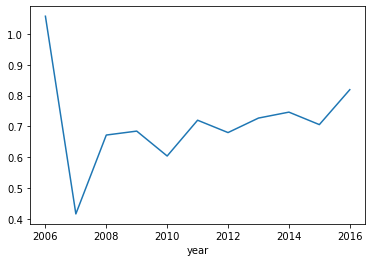

In [123]:
(rtn_series +1).cumprod().plot()

## 소형주 + 저pbr전략

In [158]:
# 시가총액 하위 20% 수치 
market_cap_quantile_series = df.groupby('year')['시가총액'].quantile(0.2)

In [159]:
market_cap_quantile_series

year
2006    2.466184e+10
2007    2.827930e+10
2008    2.428395e+10
2009    1.740554e+10
2010    2.518032e+10
2011    2.819279e+10
2012    3.007759e+10
2013    3.381917e+10
2014    3.539190e+10
2015    4.683618e+10
2016    5.485006e+10
2017    6.175322e+10
Name: 시가총액, dtype: float64

### filtered_df : 시가총액 하위20%, pbr 0.2 이상

In [160]:
filtered_df = df.join(market_cap_quantile_series, on='year', how='left', rsuffix='quantile_0.2')
filtered_df

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,195293494.0,2.466184e+10
1,A000040,KR모터스,1.441257e+11,1.118560e+11,97.07,1.44,0.82,-7.78,16.84,40.67,2006,1098,-21.98,28190608.0,81250312.0,2.466184e+10
2,A000050,경방,2.756000e+11,1.802700e+11,426.23,0.86,2.01,5.78,15.34,20.66,2006,10339,-1.80,17344611.0,515345506.0,2.466184e+10
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,973804019.0,2.466184e+10
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,746417156.0,2.466184e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,A900290,GRT,2.139156e+11,1.311945e+11,NaN,0.00,NaN,NaN,NaN,NaN,2017,3335,NaN,NaN,NaN,6.175322e+10
19764,A900300,오가닉티코스메틱,1.872832e+11,1.040920e+11,6.52,1.55,1.35,11.96,3.68,3.82,2017,3030,31.91,NaN,NaN,6.175322e+10
19765,A950110,SBI핀테크솔루션즈,2.157447e+11,5.952397e+10,22.22,2.79,1.01,5.56,-0.21,-0.26,2017,7200,4.22,4972417.0,30428841.0,6.175322e+10
19766,A950130,엑세스바이오,1.399257e+11,1.021458e+11,544.57,2.88,5.10,-8.74,77.25,-1351.73,2017,4580,0.59,2134312.0,65728187.0,6.175322e+10


In [161]:
# 시가총액 하위20%만 선별
filtered_df = filtered_df[filtered_df['시가총액']<= filtered_df['시가총액quantile_0.2']]

In [162]:
 # pbr 적어도 0.2보단 커야 말이된다
filtered_df = filtered_df[filtered_df['pbr']>=0.2]

In [163]:
smallest_pbr_series = filtered_df.groupby('year')['pbr'].nsmallest(15)

In [164]:
filtered_df.head()

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
21,A000440,중앙에너비스,1.519860e+10,5.828663e+09,12.56,0.37,0.17,15.08,7.60,10.19,2006,5234,3.47,4359080.0,51819700.0,2.466184e+10
34,A000760,이화산업,1.115800e+10,5.161691e+09,-0.98,0.27,0.18,-9.36,-5.83,-5.53,2006,3965,-9.84,1457925.0,93661256.0,2.466184e+10
40,A000910,유니온,1.976983e+10,8.811414e+09,22.40,0.32,0.37,5.07,6.73,18.71,2006,1632,0.66,4516111.0,95440233.0,2.466184e+10
44,A001000,신라섬유,1.545000e+10,8.503680e+09,-53.00,1.68,14.95,-13.33,-72.11,-59.79,2006,1120,0.30,25672808.0,39723341.0,2.466184e+10
52,A001140,국보,9.553927e+09,6.067699e+09,258.79,0.55,0.14,3.66,6.75,17.78,2006,800,0.87,12534042.0,71494973.0,2.466184e+10


### smallest_pbr_series : pbr 하위 15개

In [165]:
smallest_pbr_series = filtered_df.groupby('year')['pbr'].nsmallest(15)
smallest_pbr_series

year       
2006  882      0.22
      359      0.25
      433      0.25
      1012     0.25
      341      0.26
               ... 
2017  18546    0.40
      18015    0.41
      18188    0.42
      18043    0.43
      18712    0.43
Name: pbr, Length: 180, dtype: float64

In [166]:
selected_index = smallest_pbr_series.index.get_level_values(1)
selected_df = filtered_df.loc[selected_index]
selected_df.head()

,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,시가총액quantile_0.2
882,A037240,평안물산,2.115000e+10,2.049858e+10,-0.36,0.22,0.31,-1.85,-4.44,-4.06,2006,113846,-27.23,4493833.0,24299630.0,2.466184e+10
359,A008830,대동기어,7.190019e+09,3.925750e+09,19.21,0.25,0.08,0.90,3.00,13.61,2006,1842,1.19,8026964.0,58404722.0,2.466184e+10
433,A011300,성안,1.762608e+10,1.075014e+10,44.76,0.25,0.23,3.01,9.79,16.14,2006,329,3.52,6863195.0,126931054.0,2.466184e+10
1012,A044180,KD건설,2.351100e+10,1.679391e+10,18.05,0.25,0.18,-1.66,8.91,27.25,2006,1166603,1.25,13932463.0,45560783.0,2.466184e+10
341,A008110,대동전자,2.210000e+10,1.429207e+10,26.80,0.26,0.96,-9.68,-15.95,138.70,2006,2411,-1.86,11293319.0,90318981.0,2.466184e+10


In [167]:
selected_df = selected_df.pivot(index='year', columns='Name', values='pbr')
selected_df

Name,CU전자,KD건설,SG충방,고려산업,광림,국동,국보,국일제지,금비,까뮤이앤씨,...,한일단조,한일철강,한일화학,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화천기계,휴맥스홀딩스
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,0.28,NaN,0.33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,0.43,NaN,NaN,NaN,...,NaN,NaN,NaN,0.4,NaN,NaN,NaN,0.32,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,0.24,0.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN
2012,0.26,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,NaN,0.21,...,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,...,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
asset_on_df = selected_df.notna().astype(int).replace(0,np.nan)
asset_on_df

Name,CU전자,KD건설,SG충방,고려산업,광림,국동,국보,국일제지,금비,까뮤이앤씨,...,한일단조,한일철강,한일화학,한컴시큐어,현우산업,형지I&C,혜인,화승인더,화천기계,휴맥스홀딩스
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
selected_rtn_df = yearly_rtn_df * asset_on_df
selected_rtn_df

Name,3S,3SOFT,3노드디지탈,AD모터스,AJS,AJ네트웍스,AJ렌터카,AK홀딩스,APS홀딩스,AP시스템,...,휴온스,휴온스글로벌,휴젤,휴켐스,흥구석유,흥국,흥국에프엔비,흥아해운,희림,희훈디앤지
year,,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
selected_rtn_df.mean(axis=1)

year
2006    0.666900
2007   -0.385909
2008    0.150773
2009    0.688427
2010   -0.062449
2011   -0.097917
2012    0.134842
2013    0.410767
2014    0.556706
2015    0.175729
2016   -0.088552
2017         NaN
dtype: float64

In [171]:
cum_rtn_str_df = (selected_rtn_df.mean(axis=1)+1).cumprod()

<AxesSubplot:xlabel='year'>

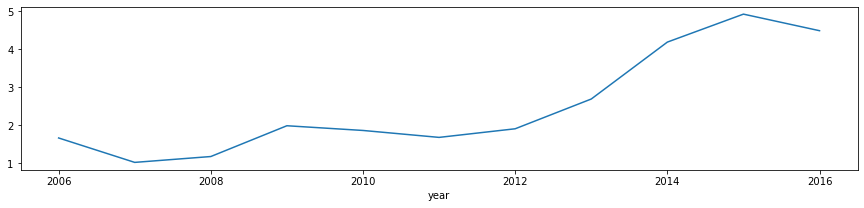

In [172]:
cum_rtn_str_df.plot(figsize=(15,3))

## 벤저민 그레엄

In [75]:
# roa 5% 이상
# 부채비율 50% 이하
# pbr 0.2 이상
# pbr 낮은 순으로 20~ 30개 매수

In [82]:
filtered_df = df[df['ROA'] >= 0.05]
filtered_df['부채비율'] = filtered_df['비유동부채']/filtered_df['자산총계']
filtered_df = filtered_df[filtered_df['부채비율'] <= 0.5]
filtered_df = filtered_df[filtered_df['pbr'] >= 0.2]
filtered_df.head()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8016/2825759907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['부채비율'] = filtered_df['비유동부채']/filtered_df['자산총계']


,Code,Name,시가총액,유통시가총액,per,pbr,psr,pcr,EV/EBITDA,EV/EBIT,year,수정주가,ROA,비유동부채,자산총계,부채비율
0,A000020,동화약품,1.131225e+11,6.552053e+10,11.23,0.55,0.56,4.39,3.48,4.39,2006,6460,3.81,11961630.0,1.952935e+08,0.061250
3,A000070,삼양홀딩스,6.024322e+11,2.815768e+11,8.36,0.57,0.53,11.16,4.60,6.21,2006,63563,5.49,60878366.0,9.738040e+08,0.062516
4,A000100,유한양행,1.382098e+12,1.018468e+12,25.28,2.67,4.07,-27.99,15.72,17.16,2006,24911,7.53,95212024.0,7.464172e+08,0.127559
5,A000120,CJ대한통운,8.515324e+11,6.057801e+11,9.38,0.54,0.38,50.52,6.44,11.52,2006,70275,1.47,325630138.0,1.267195e+09,0.256969
6,A000140,하이트진로홀딩스,2.476440e+12,1.369471e+12,47.46,3.12,3.62,98.33,20.64,31.14,2006,63869,5.96,130290172.0,1.851565e+09,0.070368


In [ ]:
selected_index = smallest_pbr_